# CUSTOMER ANALYTICS

- Master beginner and advanced customer analytics

- Learn the most important type of analysis applied by mid and large companies

- Gain access to a professional team of trainers with exceptional quant skills

- Wow interviewers by acquiring a highly desired skill

- Understand the fundamental marketing modeling theory: segmentation, targeting, positioning, marketing mix, and price elasticity;

- Apply segmentation on your customers, starting from raw data and reaching final customer segments;

- Perform K-means clustering with a customer analytics focus;

- Apply Principal Components Analysis (PCA) on your data to preprocess your features;

- Combine PCA and K-means for even more professional customer segmentation;

- Deploy your models on a different dataset;

- Learn how to model purchase incidence through probability of purchase elasticity;

- Model brand choice by exploring own-price and cross-price elasticity;

- Complete the purchasing cycle by predicting purchase quantity elasticity

- Carry out a black box deep learning model with TensorFlow 2.0 to predict purchasing behavior with unparalleled accuracy

- Be able to optimize your neural networks to enhance results

# Libs

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

# Dataset

In [2]:
df_segmentation = pd.read_csv('data.csv')

# Analysis

In [3]:
df_segmentation.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [4]:
df_segmentation.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

### Correlation

In [5]:
df_segmentation.corr()

ID       Sex  Marital status       Age  Education  \
ID               1.000000  0.328262        0.074403 -0.085246   0.012543   
Sex              0.328262  1.000000        0.566511 -0.182885   0.244838   
Marital status   0.074403  0.566511        1.000000 -0.213178   0.374017   
Age             -0.085246 -0.182885       -0.213178  1.000000   0.654605   
Education        0.012543  0.244838        0.374017  0.654605   1.000000   
Income          -0.303217 -0.195146       -0.073528  0.340610   0.233459   
Occupation      -0.291958 -0.202491       -0.029490  0.108388   0.064524   
Settlement size -0.378445 -0.300803       -0.097041  0.119751   0.034732   

                   Income  Occupation  Settlement size  
ID              -0.303217   -0.291958        -0.378445  
Sex             -0.195146   -0.202491        -0.300803  
Marital status  -0.073528   -0.029490        -0.097041  
Age              0.340610    0.108388         0.119751  
Education        0.233459    0.064524         0.034732  
Income           1.000000    0.680357         0.490881  
Occupation       0.680357    1.000000         0.571795  
Settlement size  0.490881    0.571795         1.000000

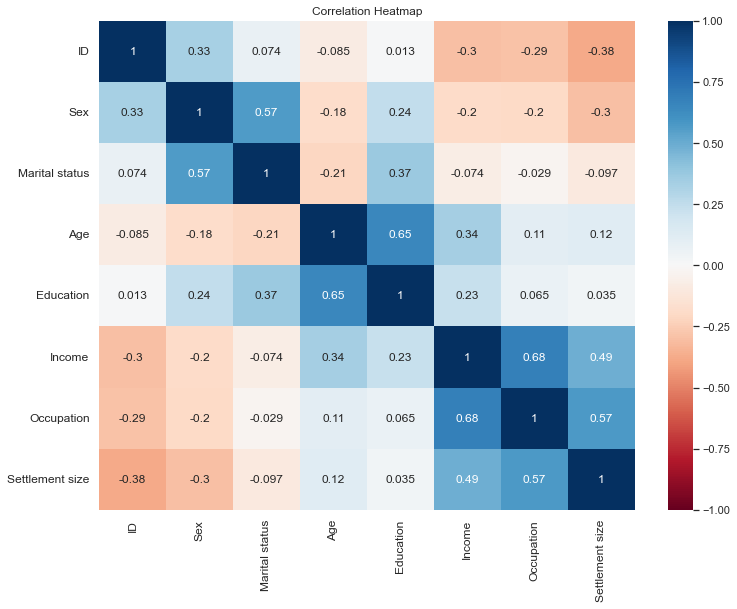

In [6]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

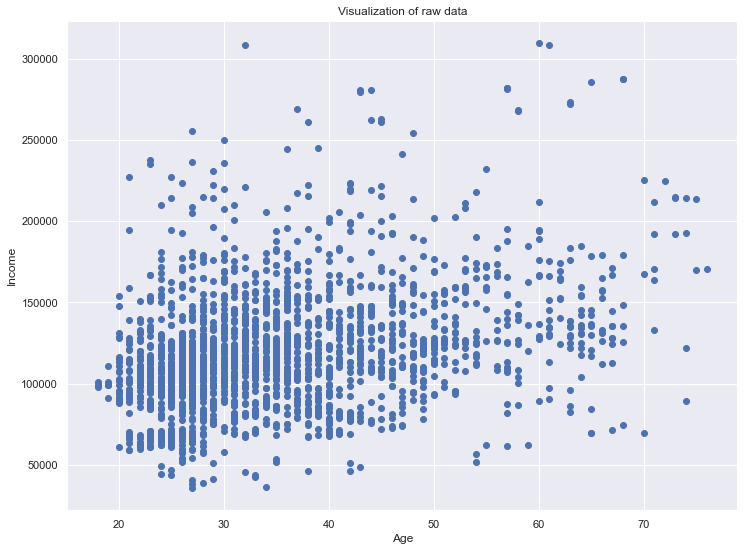

In [7]:
# raw data
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation['Age'], df_segmentation['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## Standardization

In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Hierarquical Clustering

In [9]:
hier_clust = linkage(segmentation_std, method = 'ward')

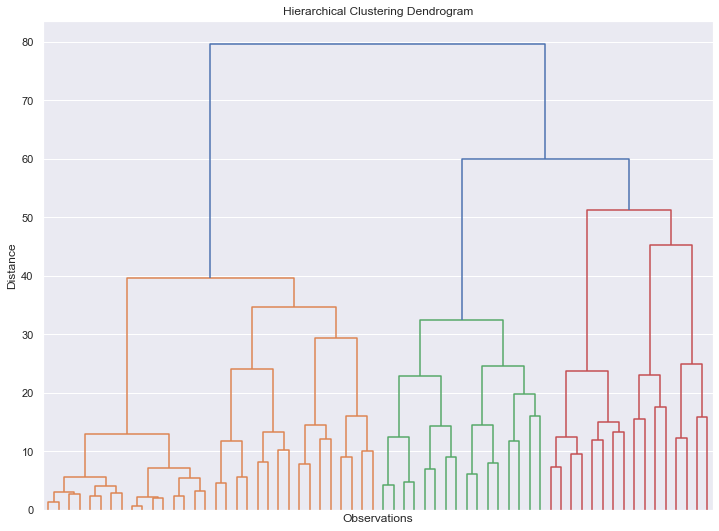

In [10]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

## K-means Clustering

In [11]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[16000.0,
 12066.146078039485,
 10195.669345598915,
 8805.254481669768,
 7871.962984436148,
 7279.652806264402,
 6739.639835881734,
 6239.019877699331,
 5925.062962292428,
 5605.561172007988]

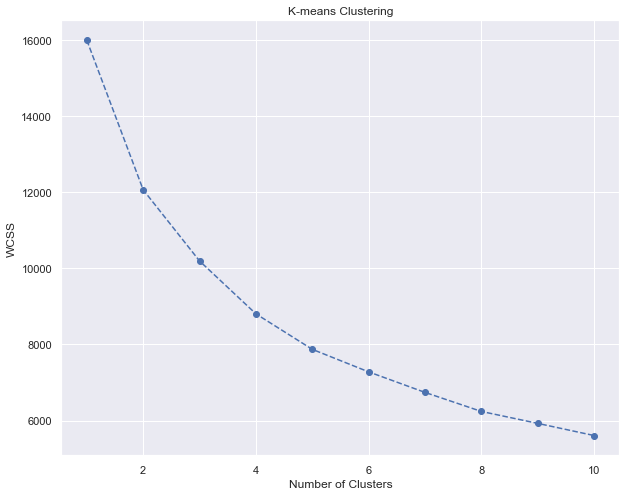

In [13]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(segmentation_std)


KMeans(n_clusters=4, random_state=42)

### Results

In [15]:
kmeans.labels_

array([3, 0, 2, ..., 2, 0, 2], dtype=int32)

In [16]:
set(kmeans.labels_)

{0, 1, 2, 3}

In [17]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [18]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

ID       Sex  Marital status        Age  Education  \
Segment K-means                                                                 
0                1.000011e+08  0.876289        0.998527  29.002946   1.067747   
1                1.000007e+08  0.030063        0.178797  35.632911   0.737342   
2                1.000014e+08  0.403341        0.042959  34.689737   0.742243   
3                1.000009e+08  0.485185        0.681481  55.814815   2.125926   

                        Income  Occupation  Settlement size  
Segment K-means                                              
0                105597.536082    0.630339         0.418262  
1                139944.602848    1.250000         1.387658  
2                 94407.322196    0.255370         0.059666  
3                156320.200000    1.096296         1.081481

In [19]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [20]:
df_segm_analysis

ID       Sex  Marital status        Age  Education  \
Segment K-means                                                                 
0                1.000011e+08  0.876289        0.998527  29.002946   1.067747   
1                1.000007e+08  0.030063        0.178797  35.632911   0.737342   
2                1.000014e+08  0.403341        0.042959  34.689737   0.742243   
3                1.000009e+08  0.485185        0.681481  55.814815   2.125926   

                        Income  Occupation  Settlement size  N Obs  Prop Obs  
Segment K-means                                                               
0                105597.536082    0.630339         0.418262    679    0.3395  
1                139944.602848    1.250000         1.387658    632    0.3160  
2                 94407.322196    0.255370         0.059666    419    0.2095  
3                156320.200000    1.096296         1.081481    270    0.1350

In [21]:
# rename cluster
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

ID       Sex  Marital status        Age  \
Segment K-means                                                          
well-off             1.000011e+08  0.876289        0.998527  29.002946   
fewer-opportunities  1.000007e+08  0.030063        0.178797  35.632911   
standard             1.000014e+08  0.403341        0.042959  34.689737   
career focused       1.000009e+08  0.485185        0.681481  55.814815   

                     Education         Income  Occupation  Settlement size  \
Segment K-means                                                              
well-off              1.067747  105597.536082    0.630339         0.418262   
fewer-opportunities   0.737342  139944.602848    1.250000         1.387658   
standard              0.742243   94407.322196    0.255370         0.059666   
career focused        2.125926  156320.200000    1.096296         1.081481   

                     N Obs  Prop Obs  
Segment K-means                       
well-off               679    0.3395  
fewer-opportunities    632    0.3160  
standard               419    0.2095  
career focused         270    0.1350

In [22]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

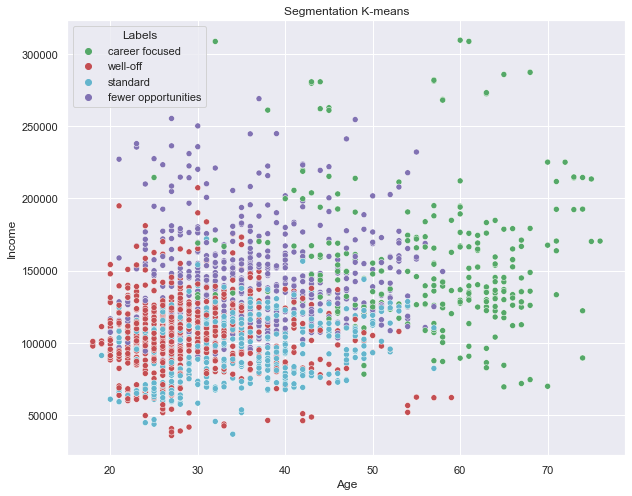

In [23]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

# PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(segmentation_std)

PCA()

In [26]:
pca.explained_variance_ratio_

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

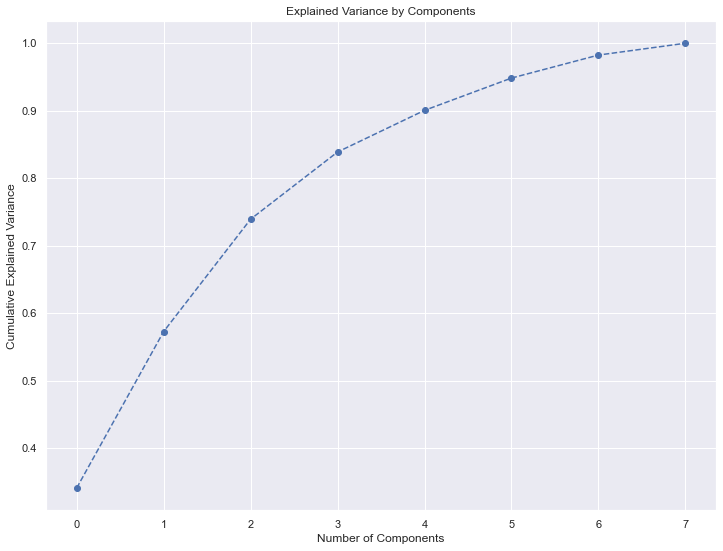

In [29]:
plt.figure(figsize = (12,9))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [30]:
pca = PCA(n_components = 3)

In [31]:
pca.fit(segmentation_std)

PCA(n_components=3)

## PCA RESULTS

In [32]:
pca.components_

array([[-0.34541048, -0.32858553, -0.18726934,  0.27028302,  0.10451468,
         0.48384405,  0.46168136,  0.45433728],
       [ 0.10723681,  0.4213196 ,  0.47208337,  0.35525956,  0.65278586,
         0.17628427,  0.06136181, -0.0307768 ],
       [ 0.14352194, -0.31795888, -0.4854334 ,  0.61344196,  0.25225754,
        -0.12360121, -0.34456626, -0.26212582]])

In [33]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

ID       Sex  Marital status       Age  Education  \
Component 1 -0.345410 -0.328586       -0.187269  0.270283   0.104515   
Component 2  0.107237  0.421320        0.472083  0.355260   0.652786   
Component 3  0.143522 -0.317959       -0.485433  0.613442   0.252258   

               Income  Occupation  Settlement size  
Component 1  0.483844    0.461681         0.454337  
Component 2  0.176284    0.061362        -0.030777  
Component 3 -0.123601   -0.344566        -0.262126

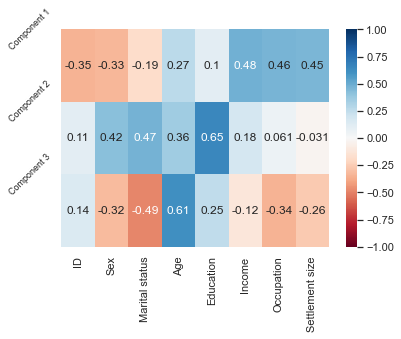

In [35]:
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9);

In [36]:
pca.transform(segmentation_std)

array([[ 2.85978214,  0.93667597,  2.03658632],
       [ 0.94413038,  0.39449213, -2.43378502],
       [-0.02303213, -0.8817974 ,  1.97408269],
       ...,
       [-1.84179778, -2.15868138,  1.1160118 ],
       [-2.71683211,  0.56139001, -0.4762533 ],
       [-2.2097949 , -2.42344957,  0.86070907]])

In [37]:
scores_pca = pca.transform(segmentation_std)

## K-Means clustering with PCA

In [40]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

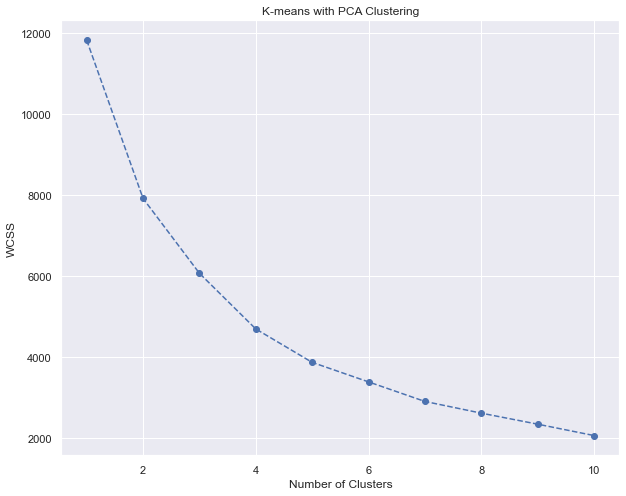

In [41]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [42]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [43]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## K-Means clustering with PCA

In [44]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [45]:
df_segm_pca_kmeans

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  Component 1  Component 2  Component 3  \
0                   2     2.859782     0.936676     2.036586   
1                   2     0.944130     0.394492    -2.433785   
2                   0    -0.023032    -0.881797     1.974083   
3                   1     2.212422    -0.563616     0.635332   
4                   1     2.110202    -0.425124     1.127543   
...               ...          ...          ...          ...   
1995                0    -1.485348     0.432286     1.615196   
1996                0    -1.672129     0.839600    -0.923547   
1997                0    -1.841798    -2.158681     1.116012   
1998                0    -2.716832     0.561390    -0.476253   
1999                0    -2.209795    -2.423450     0.860709   

      Segment K-means PCA  
0                       1  
1                       2  
2                       3  
3                       2  
4                       2  
...                   ...  
1995                    3  
1996                    0  
1997                    3  
1998                    0  
1999                    3  

[2000 rows x 12 columns]

In [46]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

ID       Sex  Marital status        Age  \
Segment K-means PCA                                                      
0                    1.000012e+08  0.919040        0.967016  28.958021   
1                    1.000009e+08  0.492537        0.679104  55.873134   
2                    1.000007e+08  0.036278        0.194006  35.466877   
3                    1.000013e+08  0.338747        0.099768  34.902552   

                     Education         Income  Occupation  Settlement size  \
Segment K-means PCA                                                          
0                     1.064468  106617.467766    0.659670         0.427286   
1                     2.130597  156430.727612    1.097015         1.082090   
2                     0.739748  140435.219243    1.255521         1.394322   
3                     0.756381   92426.039443    0.211137         0.044084   

                     Component 1  Component 2  Component 3  
Segment K-means PCA                                         
0                      -1.205155     0.616021    -0.833262  
1                       1.483593     2.152720     0.893411  
2                       1.471999    -0.935925    -0.187509  
3                      -1.222765    -0.915172     1.009819

In [47]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

ID       Sex  Marital status        Age  \
Segment K-means PCA                                                      
standard             1.000012e+08  0.919040        0.967016  28.958021   
career focused       1.000009e+08  0.492537        0.679104  55.873134   
fewer opportunities  1.000007e+08  0.036278        0.194006  35.466877   
well-off             1.000013e+08  0.338747        0.099768  34.902552   

                     Education         Income  Occupation  Settlement size  \
Segment K-means PCA                                                          
standard              1.064468  106617.467766    0.659670         0.427286   
career focused        2.130597  156430.727612    1.097015         1.082090   
fewer opportunities   0.739748  140435.219243    1.255521         1.394322   
well-off              0.756381   92426.039443    0.211137         0.044084   

                     Component 1  Component 2  Component 3  N Obs  Prop Obs  
Segment K-means PCA                                                          
standard               -1.205155     0.616021    -0.833262    667    0.3335  
career focused          1.483593     2.152720     0.893411    268    0.1340  
fewer opportunities     1.471999    -0.935925    -0.187509    634    0.3170  
well-off               -1.222765    -0.915172     1.009819    431    0.2155

In [48]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

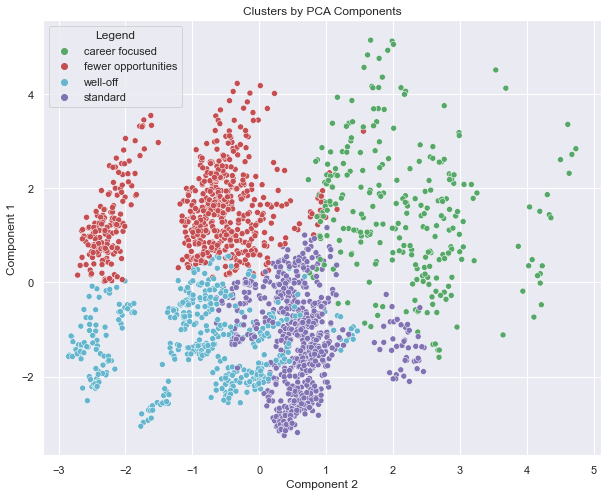

In [50]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x = x_axis, y= y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

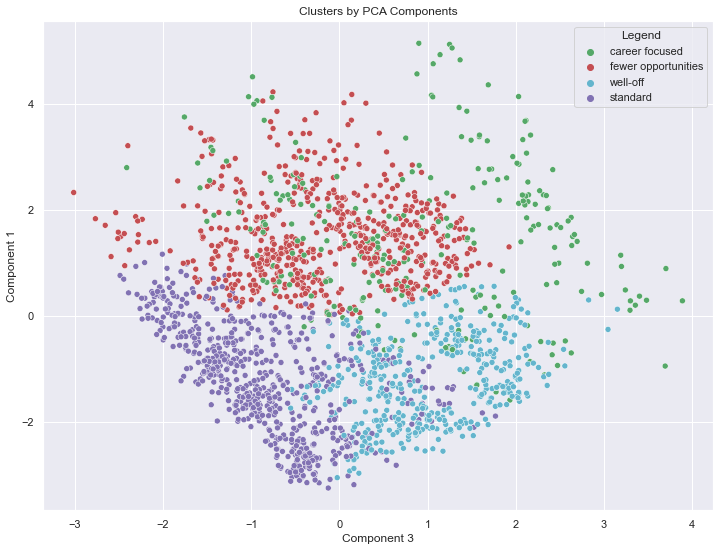

In [52]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (12, 9))
sns.scatterplot(x = x_axis_1, y = y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components' )
plt.show()

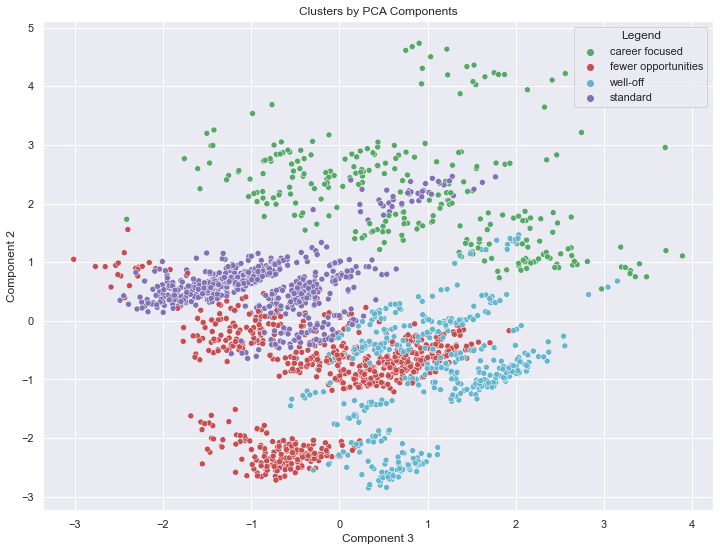

In [53]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (12, 9))
sns.scatterplot(x = x_axis_1, y = y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components' )
plt.show()

# DATA EXPORT

In [56]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [60]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [61]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))